In [1]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#---------

#Exploracion de archivos
import sys
sys.path.append('../')
#---------
#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
#---------
#Funciones personalizadas
from src import sp_abtest as sab


In [2]:
import scipy.stats as stats

In [3]:
df = pd.read_csv('../data/data_limpios_no_nulos.csv')
df.sample(5)

,user_id,group,visit_date,conversion,product_category,product_id,product_name,quantity,discount,total_value,payment_method,shipping_method,region,customer_age,customer_gender,device,session_duration,coupon_used,browser,referral_source,conversion_str,price_knn
1668,1669,a,2022-03-24,0,beauty,1656,lipstick,0,0.20,0.0,no_conversion,no_conversion,west,19.0,f,tablet,8,no_conversion,chrome,social,no,51.530000
1878,1879,a,2022-01-29,0,fashhion,1041,jeans,0,0.17,0.0,no_conversion,no_conversion,west,39.0,m,tablet,22,no_conversion,chrome,organic,no,184.572138
237,238,a,2022-01-16,0,toys,1716,action_figure,0,0.27,0.0,no_conversion,no_conversion,north,45.0,m,desktop,24,no_conversion,firefox,email,no,58.470000
1864,1865,b,2022-02-17,0,fashhion,1199,t-shirt,0,0.01,0.0,no_conversion,no_conversion,south,37.0,m,tablet,23,no_conversion,edge,email,no,74.610000
92,93,b,2022-03-01,0,home,1447,sofa,0,0.13,0.0,no_conversion,no_conversion,south,51.0,f,desktop,16,no_conversion,edge,email,no,464.120000


In [4]:
df['group'].unique()

array(['a', 'b'], dtype=object)

In [5]:
df['group'].value_counts()/df.shape[0]*100

group
b    50.65
a    49.35
Name: count, dtype: float64

In [6]:
sab.exploracion_df_abtesting(df, 'group')

Los principales estadisticos de las columnas categoricas para el grupo A son:


,count,unique,top,freq
group,987,1,a,987
visit_date,987,90,2022-01-19,19
product_category,987,7,fashhion,165
product_name,987,28,jeans,49
payment_method,987,5,no_conversion,886
shipping_method,987,4,no_conversion,886
region,987,5,south,225
customer_gender,987,3,f,492
device,987,3,tablet,354
coupon_used,987,3,no_conversion,886


Los principales estadisticos de las columnas numericas para el grupo A son:


,count,mean,std,min,25%,50%,75%,max
user_id,987.0,999.448835,576.199597,1.00,518.500,983.000000,1498.50,2000.00
conversion,987.0,0.102330,0.303236,0.00,0.000,0.000000,0.00,1.00
product_id,987.0,1498.579534,293.157734,1001.00,1248.000,1495.000000,1754.50,1998.00
quantity,987.0,0.291793,0.972212,0.00,0.000,0.000000,0.00,5.00
discount,987.0,0.152396,0.085578,0.00,0.080,0.150224,0.23,0.30
total_value,987.0,41.642280,218.045865,0.00,0.000,0.000000,0.00,2899.50
customer_age,987.0,43.584600,15.263729,18.00,30.500,42.000000,56.00,70.00
session_duration,987.0,15.721378,8.697904,1.00,8.000,16.000000,23.00,30.00
price_knn,987.0,182.785984,209.210432,5.02,47.435,99.950000,232.75,998.88


------------------------------------
Los principales estadisticos de las columnas categoricas para el grupo B son:


,count,unique,top,freq
group,1013,1,b,1013
visit_date,1013,90,2022-01-28,22
product_category,1013,7,fashhion,156
product_name,1013,28,science_fiction,58
payment_method,1013,5,no_conversion,867
shipping_method,1013,4,no_conversion,867
region,1013,5,east,217
customer_gender,1013,3,f,505
device,1013,3,mobile,357
coupon_used,1013,3,no_conversion,867


Los principales estadisticos de las columnas numericas para el grupo B son:


,count,mean,std,min,25%,50%,75%,max
user_id,1013.0,1001.524186,579.036318,2.00,489.00,1015.00,1501.00,1997.00
conversion,1013.0,0.144126,0.351391,0.00,0.00,0.00,0.00,1.00
product_id,1013.0,1504.463968,281.364999,1000.00,1266.00,1527.00,1736.00,1997.00
quantity,1013.0,0.448174,1.200514,0.00,0.00,0.00,0.00,5.00
discount,1013.0,0.148109,0.085847,0.00,0.07,0.15,0.22,0.30
total_value,1013.0,61.607828,249.343541,0.00,0.00,0.00,0.00,2904.07
customer_age,1013.0,42.693978,15.148251,18.00,29.00,42.00,56.00,70.00
session_duration,1013.0,15.547878,8.690150,1.00,8.00,16.00,23.00,30.00
price_knn,1013.0,186.312447,210.559922,5.34,45.85,111.97,230.83,995.65


------------------------------------


Aparentemente hay diferencias pero no grandes. Habria que analizarlo con estadisticos especificos

# Métricas a estudiar
- conversion
- total_value
- session_duration
- quantity

Text(0.5, 1.0, 'Cantidad')

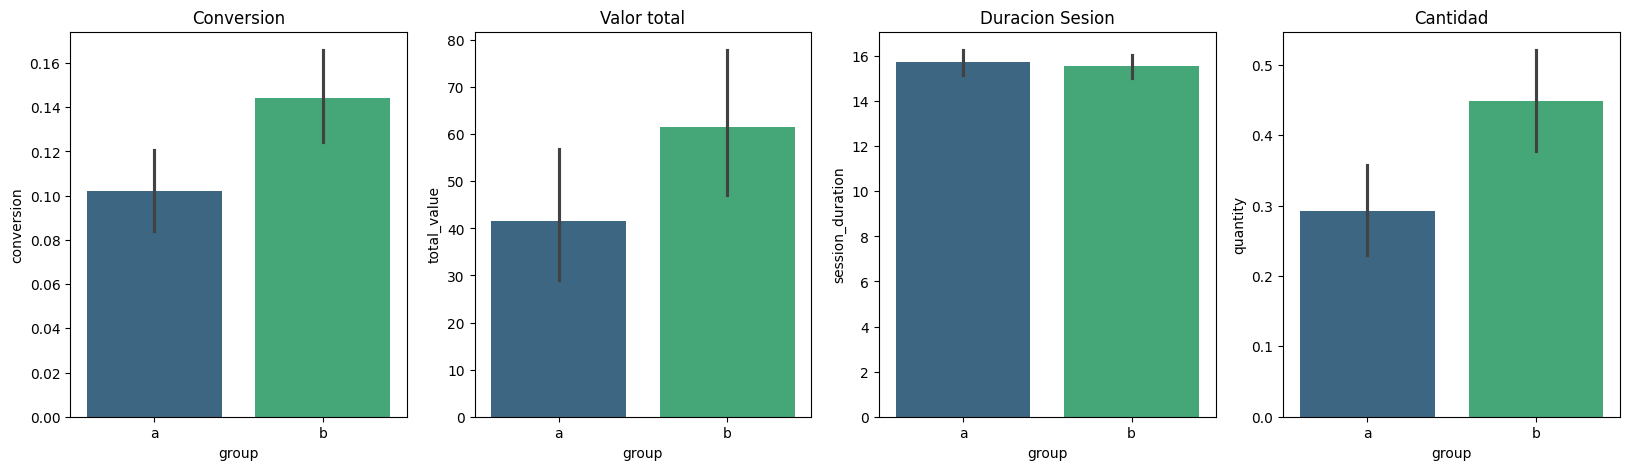

In [7]:
fig, axes = plt.subplots(nrows =1, ncols=4, figsize=(20,5))

sns.barplot(x='group',y='conversion', data = df, ax=axes[0], hue='group',palette='viridis')
axes[0].set_title('Conversion')
sns.barplot(x='group',y='total_value', data = df, ax=axes[1], hue='group',palette='viridis')
axes[1].set_title('Valor total')
sns.barplot(x='group',y='session_duration', data = df, ax=axes[2], hue='group',palette='viridis')
axes[2].set_title('Duracion Sesion')
sns.barplot(x='group',y='quantity', data = df, ax=axes[3], hue='group',palette='viridis')
axes[3].set_title('Cantidad')

In [8]:
metricas = ['conversion', 'total_value','session_duration','quantity']

Vamos a ver la normalidad

In [9]:
sab.normalidad(df,metricas)

Para la columna CONVERSION los datos NO siguen una distribucion normal
Para la columna TOTAL_VALUE los datos NO siguen una distribucion normal
Para la columna SESSION_DURATION los datos NO siguen una distribucion normal
Para la columna QUANTITY los datos NO siguen una distribucion normal


En este caso NO seria necesario hacer el la homocedasticidad pero lo vamos a hacer para tener un ejemplo

In [10]:
sab.homocedasticidad(df, 'group', metricas)

Para la columna CONVERSION las varianzas son homogéneas entre grupos, es decir, NO hay homocedasticidad
Para la columna TOTAL_VALUE las varianzas son homogéneas entre grupos, es decir, SI hay homocedasticidad
Para la columna SESSION_DURATION las varianzas son homogéneas entre grupos, es decir, SI hay homocedasticidad
Para la columna QUANTITY las varianzas son homogéneas entre grupos, es decir, NO hay homocedasticidad


Aplicamos el test de Man Whitney

In [11]:
sab.mannwhitneyu(df, 'group', metricas)

Para la métrica CONVERSION, las medianas no son iguales, es decir, SI hay diferencias significativas entre los grupos
Para la métrica TOTAL_VALUE, las medianas no son iguales, es decir, SI hay diferencias significativas entre los grupos
Para la métrica SESSION_DURATION, las medianas son iguales, es decir, NO hay diferencias significativas entre los grupos
Para la métrica QUANTITY, las medianas no son iguales, es decir, SI hay diferencias significativas entre los grupos
